/home/L509/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.28792241725189244


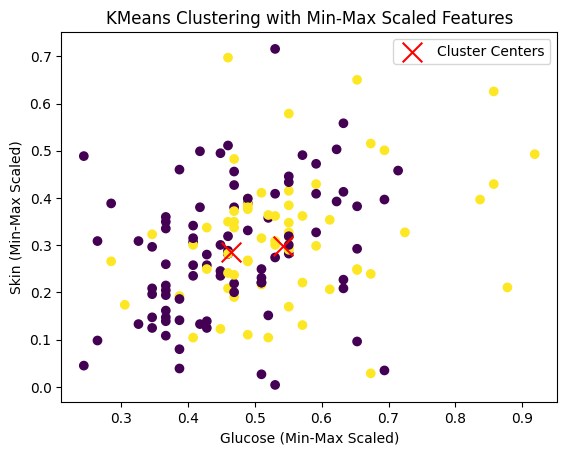

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler  # Import the MinMaxScaler
import matplotlib.pyplot as plt


# Load the diabetes dataset
file_path = 'cdiabetes.csv'
df = pd.read_csv(file_path)

# Select features (exclude the outcome column)
features = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']]

# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the scaled data into train and test sets
X_train, X_test = train_test_split(features_scaled, test_size=0.2, random_state=42)

# Fit KMeans clustering on the training set
n_clusters = 2# Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

# Predict clusters for the test set
test_clusters = kmeans.predict(X_test)

# Evaluate the clustering performance using silhouette score
silhouette_avg = silhouette_score(X_test, test_clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Visualize the clusters (using the first two features for simplicity)
plt.scatter(X_test[:, 2], X_test[:, 5], c=test_clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 5], marker='x', s=200, c='red', label='Cluster Centers')
plt.xlabel('Glucose (Min-Max Scaled)')
plt.ylabel('Skin (Min-Max Scaled)')
plt.title('KMeans Clustering with Min-Max Scaled Features')
plt.legend()
plt.show()

